In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [3]:
df  = pd.read_csv('./predict-energy-behavior-of-prosumers/train.csv')
df.head(10)

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2
5,0,0,3,656.859,1,2021-09-01 00:00:00,0,5,2
6,0,1,0,0.000,0,2021-09-01 00:00:00,0,6,3
7,0,1,0,59.000,1,2021-09-01 00:00:00,0,7,3
8,0,1,1,0.000,0,2021-09-01 00:00:00,0,8,4
9,0,1,1,501.760,1,2021-09-01 00:00:00,0,9,4


In [4]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [5]:
pd.unique(df['county'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [6]:
serie = df[(df['county'] == 1) & (df['is_business'] == 0) & (df['product_type'] == 1) & (df['is_consumption'] == 0)]
serie

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
12,1,0,1,0.000,0,2021-09-01 00:00:00,0,12,6
134,1,0,1,0.000,0,2021-09-01 01:00:00,0,134,6
256,1,0,1,0.000,0,2021-09-01 02:00:00,0,256,6
378,1,0,1,0.000,0,2021-09-01 03:00:00,0,378,6
500,1,0,1,0.000,0,2021-09-01 04:00:00,0,500,6
...,...,...,...,...,...,...,...,...,...
2017716,1,0,1,11.796,0,2023-05-31 19:00:00,637,2017716,6
2017846,1,0,1,6.034,0,2023-05-31 20:00:00,637,2017846,6
2017976,1,0,1,3.960,0,2023-05-31 21:00:00,637,2017976,6
2018106,1,0,1,1.311,0,2023-05-31 22:00:00,637,2018106,6


In [8]:
serie_2 = df[(df['county'] == 1) & (df['is_business'] == 0) & (df['product_type'] == 1) & (df['is_consumption'] == 1)]
serie_2

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
13,1,0,1,2.756,1,2021-09-01 00:00:00,0,13,6
135,1,0,1,2.808,1,2021-09-01 01:00:00,0,135,6
257,1,0,1,2.976,1,2021-09-01 02:00:00,0,257,6
379,1,0,1,2.704,1,2021-09-01 03:00:00,0,379,6
501,1,0,1,3.331,1,2021-09-01 04:00:00,0,501,6
...,...,...,...,...,...,...,...,...,...
2017717,1,0,1,7.919,1,2023-05-31 19:00:00,637,2017717,6
2017847,1,0,1,10.694,1,2023-05-31 20:00:00,637,2017847,6
2017977,1,0,1,13.989,1,2023-05-31 21:00:00,637,2017977,6
2018107,1,0,1,14.574,1,2023-05-31 22:00:00,637,2018107,6


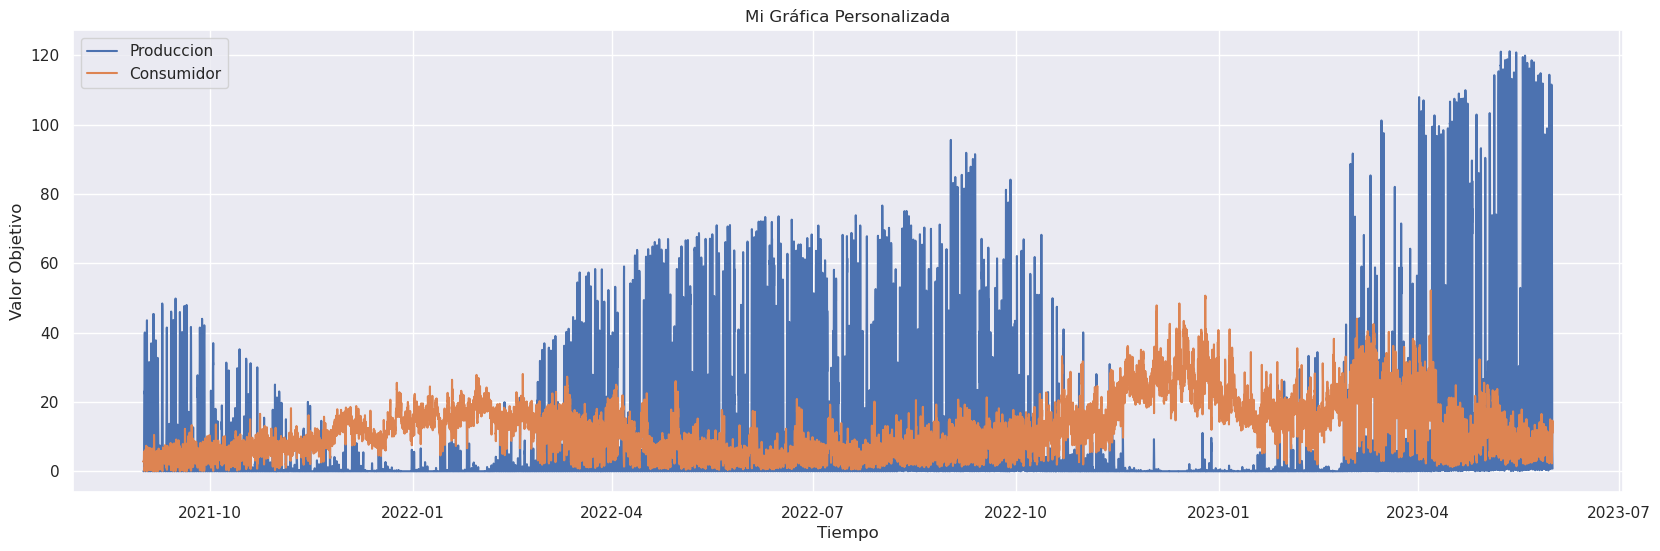

In [9]:
plt.figure(figsize=(20, 6))  

plt.plot(serie['datetime'], serie['target'], label = 'Produccion')
plt.plot(serie_2['datetime'], serie_2['target'], label = 'Consumidor')

plt.xlabel('Tiempo')
plt.ylabel('Valor Objetivo')
plt.title('Mi Gráfica Personalizada')
plt.legend()
plt.show()

# Second Time series

In [10]:
df_2 = pd.read_csv('./predict-energy-behavior-of-prosumers/historical_weather.csv')

In [11]:
df_2.head(10)

,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id
0,2021-09-01 00:00:00,14.4,12.0,0.0,0.0,1015.8,4,4,0,0,6.694444,3,0.0,0.0,0.0,57.6,21.7,1
1,2021-09-01 00:00:00,14.0,12.0,0.0,0.0,1010.6,7,8,0,0,4.944444,353,0.0,0.0,0.0,57.6,22.2,1
2,2021-09-01 00:00:00,14.4,12.8,0.0,0.0,1014.9,6,7,0,0,5.833333,348,0.0,0.0,0.0,57.6,22.7,1
3,2021-09-01 00:00:00,15.4,13.0,0.0,0.0,1014.4,4,2,4,0,7.111111,349,0.0,0.0,0.0,57.6,23.2,1
4,2021-09-01 00:00:00,15.9,12.6,0.0,0.0,1013.8,12,7,0,20,8.388889,360,0.0,0.0,0.0,57.6,23.7,1
5,2021-09-01 00:00:00,13.1,10.6,0.0,0.0,1013.4,1,1,0,0,4.500000,3,0.0,0.0,0.0,57.6,24.2,1
6,2021-09-01 00:00:00,13.0,10.7,0.0,0.0,1005.0,31,10,0,74,3.916667,357,0.0,0.0,0.0,57.6,24.7,1
7,2021-09-01 00:00:00,13.2,10.9,0.0,0.0,1005.8,41,16,0,90,3.722222,354,0.0,0.0,0.0,57.6,25.2,1
8,2021-09-01 00:00:00,13.3,10.9,0.0,0.0,1003.5,61,36,0,94,3.833333,354,0.0,0.0,0.0,57.6,25.7,1
9,2021-09-01 00:00:00,13.6,11.3,0.0,0.0,1003.5,97,68,11,97,3.722222,354,0.0,0.0,0.0,57.6,26.2,1


In [12]:
df_2['datetime'] = pd.to_datetime(df_2['datetime'])

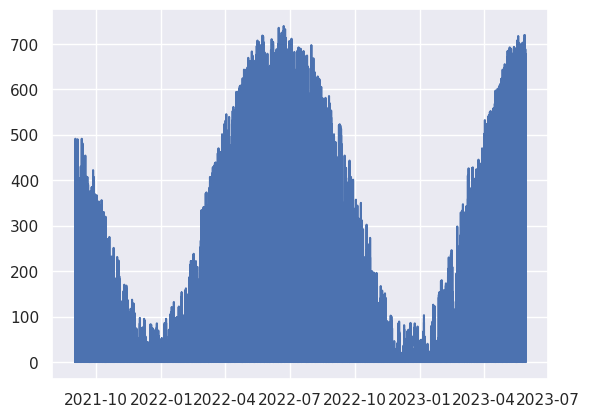

In [13]:
plt.plot(df_2['datetime'], df_2['direct_solar_radiation'])

In [12]:
df3 = pd.read_csv('./predict-energy-behavior-of-prosumers/electricity_prices.csv')

In [13]:
df3

,forecast_date,euros_per_mwh,origin_date,data_block_id
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1
2,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
3,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
4,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1
...,...,...,...,...
15281,2023-05-30 19:00:00,82.10,2023-05-29 19:00:00,637
15282,2023-05-30 20:00:00,150.85,2023-05-29 20:00:00,637
15283,2023-05-30 21:00:00,82.10,2023-05-29 21:00:00,637
15284,2023-05-30 22:00:00,82.09,2023-05-29 22:00:00,637


In [15]:
dta = pd.read_csv('./predict-energy-behavior-of-prosumers/forecast_weather.csv')

In [16]:
dta.head()

,latitude,longitude,origin_datetime,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,data_block_id,forecast_datetime,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation
0,57.6,21.7,2021-09-01 00:00:00+00:00,1,15.655786,11.553613,0.904816,0.019714,0.000000,0.905899,-0.411328,-9.106137,1,2021-09-01 01:00:00+00:00,0.0,0.0,0.0,0.0
1,57.6,22.2,2021-09-01 00:00:00+00:00,1,13.003931,10.689844,0.886322,0.004456,0.000000,0.886658,0.206347,-5.355405,1,2021-09-01 01:00:00+00:00,0.0,0.0,0.0,0.0
2,57.6,22.7,2021-09-01 00:00:00+00:00,1,14.206567,11.671777,0.729034,0.005615,0.000000,0.730499,1.451587,-7.417905,1,2021-09-01 01:00:00+00:00,0.0,0.0,0.0,0.0
3,57.6,23.2,2021-09-01 00:00:00+00:00,1,14.844507,12.264917,0.336304,0.074341,0.000626,0.385468,1.090869,-9.163999,1,2021-09-01 01:00:00+00:00,0.0,0.0,0.0,0.0
4,57.6,23.7,2021-09-01 00:00:00+00:00,1,15.293848,12.458887,0.102875,0.088074,0.000015,0.176590,1.268481,-8.975766,1,2021-09-01 01:00:00+00:00,0.0,0.0,0.0,0.0


In [31]:
dta['forecast_datetime'] = pd.to_datetime(dta['forecast_datetime'])

In [17]:
dta.columns

Index(['latitude', 'longitude', 'origin_datetime', 'hours_ahead',
       'temperature', 'dewpoint', 'cloudcover_high', 'cloudcover_low',
       'cloudcover_mid', 'cloudcover_total', '10_metre_u_wind_component',
       '10_metre_v_wind_component', 'data_block_id', 'forecast_datetime',
       'direct_solar_radiation', 'surface_solar_radiation_downwards',
       'snowfall', 'total_precipitation'],
      dtype='object')

In [18]:
df_2.columns

Index(['datetime', 'temperature', 'dewpoint', 'rain', 'snowfall',
       'surface_pressure', 'cloudcover_total', 'cloudcover_low',
       'cloudcover_mid', 'cloudcover_high', 'windspeed_10m',
       'winddirection_10m', 'shortwave_radiation', 'direct_solar_radiation',
       'diffuse_radiation', 'latitude', 'longitude', 'data_block_id'],
      dtype='object')

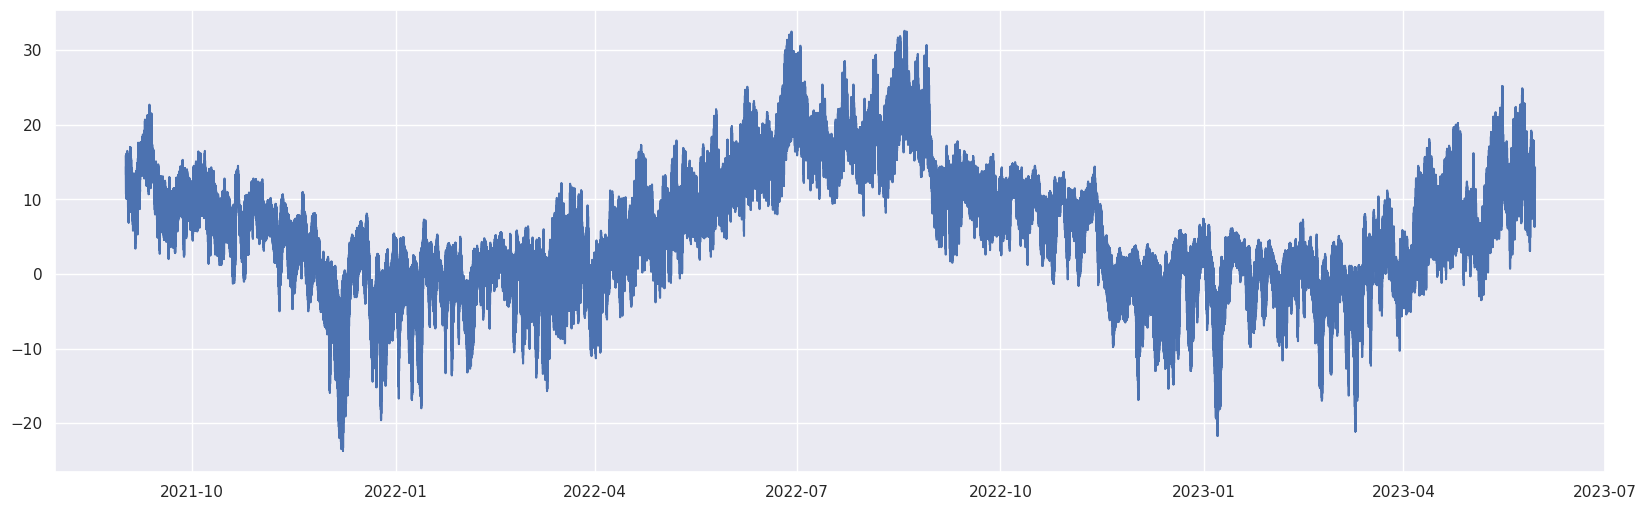

In [14]:
plt.figure(figsize=(20, 6))  

plt.plot(df_2.datetime, (df_2.temperature))

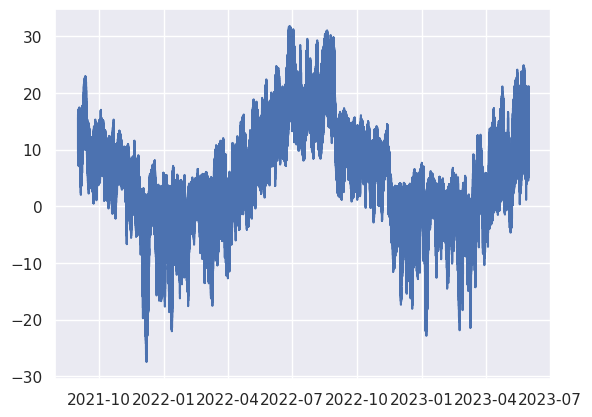

In [32]:
plt.plot(dta.forecast_datetime, (dta.temperature))


In [34]:
set(dta['data_block_id'])

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [36]:
set(df['data_block_id'])

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
